In [3]:
import pandas as pd

df = pd.read_csv("../data/processed/merged_trader_sentiment.csv")

# standardize column names
df.columns = df.columns.str.lower()

# standardize pnl column
if "closedpnl" in df.columns:
    df = df.rename(columns={"closedpnl": "pnl"})
elif "closed_pnl" in df.columns:
    df = df.rename(columns={"closed_pnl": "pnl"})

df["date"] = pd.to_datetime(df["date"])

print("PNL column exists:", "pnl" in df.columns)


PNL column exists: True


In [4]:
loss_threshold = df["pnl"].quantile(0.05)

extreme_losses = df[df["pnl"] <= loss_threshold]

extreme_losses.groupby("classification")["pnl"].describe()


,count,unique,top,freq


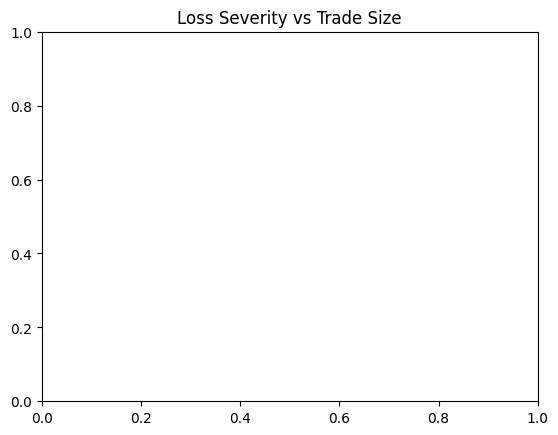

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["pnl"] < 0],
    x="size_usd",
    y="pnl",
    hue="classification",
    alpha=0.5
)
plt.title("Loss Severity vs Trade Size")
plt.show()
